# Task 1:
## Implement the Adam (Mini-Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [59]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.linalg as LA 


In [60]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [61]:
X= data[:,:-1]
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [62]:
y= data[:,3:]
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [63]:
X= np.c_[np.ones((len(X),1)),X]
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [64]:
thetas= np.zeros((4,1))
alpha= 0.0001
tolerance= 0.001
m= len(X)
thetas

array([[0.],
       [0.],
       [0.],
       [0.]])

In [132]:
def ADAM_MB(X,y,alpha,epsilon,beta1,beta2,iterations,batch_size):

    # intitalizing parameters of ADAM optimizer to be zeros 
    theta= np.zeros((4,1))
    moment=np.zeros((4,1))
    v = np.zeros((4,1))
    tolerance = 0.001


    batch_number = int(len(X)/batch_size)
    m= len(X)


    thetas=[]
    loss=[]
    hypothesises=[]
    epoch=0 # store number of epochs 
    # when indexing using i*m in the condition for convergence there seems to be an error so to solve that i used and array to save loss each epoch

    loss_per_epoch=[]
    for i in range(iterations):
        print('**************** epoch ',i,'****************')
        
        for batch_idx in range(batch_number):

            # slicing the data to get next batch
            x_MB = X[batch_idx*(batch_size):batch_size+(batch_size*batch_idx)]
            y_MB =y[batch_idx*(batch_size):batch_size+(batch_size*batch_idx)]

            # calculating the hypothesis for the current values of theta 
            h_x= x_MB@theta
            print('h(x): ',h_x)
            hypothesises.append(h_x)
            thetas.append(theta)

            # calculating the error vector 
            e = h_x - y_MB
            print("error vector :\n",e)
            
            # calculate the cost function and append loss into a list
            j=(1/(2*batch_size))*np.vdot(e,e)
            print("j = ",j)
            loss.append(j)
            
            # calculating the gradient 
            d_theta = (1/batch_size)*(x_MB.T@e)
            print('gradient :',d_theta)
            
            # getting the norm of the gradient for the check condition later 
            grad_vec= LA.norm(d_theta)
            print('gradient_vector_norm:',grad_vec)

            # updating equations for both moment and v 
            moment=(beta1*moment) + ((1-beta1)*d_theta)
            v=(beta2*v)+((1-beta2)*np.square(d_theta))


            # correcting the bias of the moment and v 
            moment_corrected = moment/(1-beta1**(i+1))
            v_corrected = v/(1-beta2**(i+1))

            # upadating theta using the corrected values
            theta = theta - ((alpha*moment_corrected)/(np.sqrt(v_corrected)+epsilon))

            
            print('theta_new :',theta)

            # end of batch 

        # appending the epoch loss into a list for the check condition
        loss_per_epoch.append(j)
        if (i > 0):
            if((grad_vec<=tolerance ) or (abs(loss_per_epoch[(i-1)]- loss_per_epoch[i]) < 0.01)):
                epoch=i
                print('using convergence check')
                
                break
                
        else:
            if((grad_vec)<=tolerance):
                break
        epoch =i       
      
    return theta,np.array(thetas), loss , hypothesises ,epoch
        

In [249]:
alpha = 0.001
epsilon= 1e-8
iterations = 1000
batch_size= 3
beta1=0.2
beta2=0.8
theta,thetas, loss , hypothesises,epoch= ADAM_MB(X,y,alpha,epsilon,beta1,beta2,iterations,batch_size)
y_pred = X@theta
print("number of iterations ", epoch)


**************** epoch  0 ****************
h(x):  [[0.]
 [0.]
 [0.]]
error vector :
 [[-152.]
 [-185.]
 [-180.]]
j =  14954.833333333332
gradient : [[  -172.33333333]
 [-14773.66666667]
 [-14940.        ]
 [-14935.        ]]
gradient_vector_norm: 25778.843080238406
theta_new : [[0.001]
 [0.001]
 [0.001]
 [0.001]]
h(x):  [[0.295]
 [0.21 ]
 [0.155]]
error vector :
 [[-195.705]
 [-141.79 ]
 [-100.845]]
j =  11429.0941916667
gradient : [[  -146.11333333]
 [-11494.37833333]
 [-11058.7       ]
 [-11680.75833333]]
gradient_vector_norm: 19770.610595217277
theta_new : [[0.00185024]
 [0.00182502]
 [0.00180983]
 [0.00182659]]
h(x):  [[0.40235109]
 [0.29857178]
 [0.46799619]]
error vector :
 [[-148.59764891]
 [-114.70142822]
 [-174.53200381]]
j =  10949.849875024018
gradient : [[  -145.94369365]
 [-10276.16307745]
 [-10402.51143347]
 [-11343.99500063]]
gradient_vector_norm: 18507.276781140597
theta_new : [[0.00261024]
 [0.00252778]
 [0.00251715]
 [0.00255844]]
h(x):  [[0.603648  ]
 [0.53999359]
 [

In [250]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.980343041458191

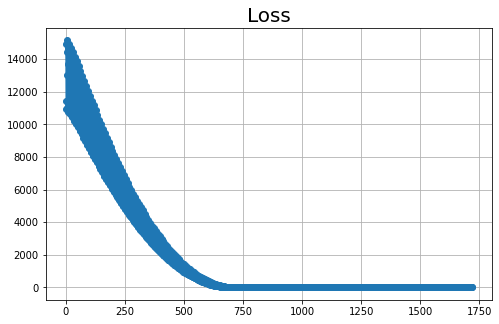

In [255]:
plt.figure(figsize=(8,5))
plt.plot(loss[:1800],'-o')
plt.title('Loss', fontsize = 20)
plt.grid()

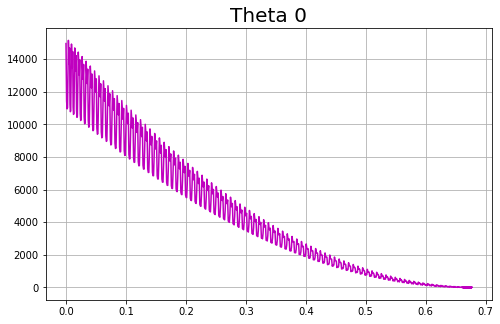

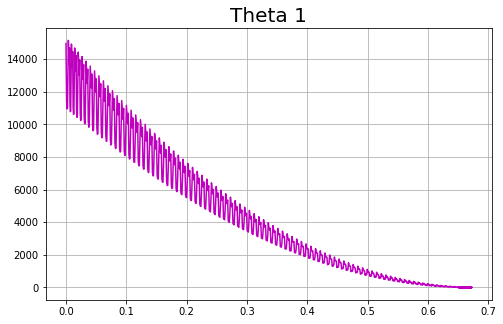

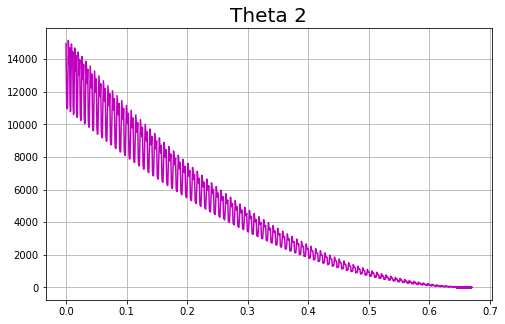

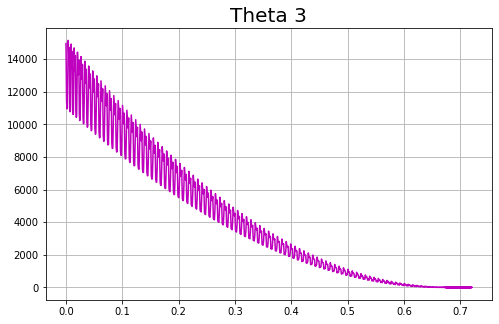

In [264]:
for i in range(4):
  plt.figure(figsize=(8,5))
  plt.plot(thetas[:,i], loss,i,color='m')
  plt.title('Theta '+str(i), fontsize = 20)
  plt.grid()
  plt.show()


# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>

In [265]:
def BFGS_MB(theta_old,theta_current,X,y ,iterations,alpha,batch_size):

    # define the intialization of the function 
    tolerance = 0.001
    batch_number = int(len(X)/batch_size)

    I= np.eye(len(theta_old))
    m = len(X)
    B= np.eye(len(theta_old))

    thetas=[]
    loss=[]
    hypothesises=[]
    epoch=0
    # when indexing using i*m in the condition for convergence there seems to be an error so to solve that i used and array to save loss each epoch
    loss_per_epoch=[] 

    for i in range(iterations):
        print('**************** epoch ',i,'****************')
        
        for batch_idx in range(batch_number):
            x_MB = X[batch_idx*(batch_size):batch_size+(batch_size*batch_idx)] 
            y_MB =y[batch_idx*(batch_size):batch_size+(batch_size*batch_idx)]

            # getting the hypothesises for each theta to get gradient later from the error vector 
            H_old= x_MB@theta_old
            H_current = x_MB@theta_current

            hypothesises.append(H_current)
            thetas.append(theta_current)

            # calculating the error vector 
            E_old= H_old-y_MB
            E_current = H_current-y_MB

            # getting the cost fucntion for the current thetas only 
            j_current= (1/(2*m))*np.vdot(E_current,E_current)
            loss.append(j_current)

            # calculating the gradient for each theta
            grad_current= (1/m)*x_MB.T@E_current
            grad_old= (1/m)*x_MB.T@E_old

            # calculating dx and dy to use for updating B_inv
            diff_y = grad_current-grad_old
            diff_x= theta_current-theta_old

            # dividing the updating equation into three main terms 
            # using np.outer to get a matrix output from vector multiplication 
            term1 = I - (np.outer(diff_x,diff_y)/(diff_y.T@diff_x))
            term2 = I - (np.outer(diff_y,diff_x)/(diff_y.T@diff_x))
            term3 = np.outer(diff_x,diff_x)/(diff_y.T@diff_x)

            # updating B 
            B= (term1@B)@term2 +term3

            # updating both thetas old and current 
            theta_old = theta_current
            theta_current = theta_current- alpha*B@grad_current

            # end of batch 

        # append into loss for each epoch to compare the last 2 epochs losses 
        loss_per_epoch.append(j_current)
        # to skip the first iteration 
        if (i>0):
            if (LA.norm(grad_current)<= tolerance) or (abs(loss_per_epoch[(i-1)]- loss_per_epoch[i]) < 0.01):
                    print("gradient = ",grad_current)
                    break
        else:
             if (LA.norm(grad_current)<= tolerance):
                  print("gradient = ",grad_current)
                  break
             
        epoch= i # get number of iterations 
    print("number of iterations ", epoch)
    print("thetas= ", theta_current)
    
    return theta_current,loss,hypothesises,thetas, epoch
    

In [171]:
np.arange(1,40).shape

(39,)

In [266]:
theta_current=np.arange(1,5).reshape((-1, 1))
thetas_old= np.arange(4,8).reshape((-1, 1))
from sklearn.utils import shuffle
theta_current, thetas_old = shuffle(theta_current, thetas_old, random_state=0)


In [267]:
theta_current

array([[3],
       [4],
       [2],
       [1]])

In [268]:
iterations = 1000
batch_size= 5 
alpha =0.01
theta_current,loss,hypothesises,thetas, epoch= BFGS_MB(thetas_old,theta_current,X,y ,iterations,alpha,batch_size)

**************** epoch  0 ****************
**************** epoch  1 ****************
**************** epoch  2 ****************
**************** epoch  3 ****************
**************** epoch  4 ****************
**************** epoch  5 ****************
**************** epoch  6 ****************
**************** epoch  7 ****************
**************** epoch  8 ****************
**************** epoch  9 ****************
**************** epoch  10 ****************
**************** epoch  11 ****************
**************** epoch  12 ****************
**************** epoch  13 ****************
**************** epoch  14 ****************
**************** epoch  15 ****************
**************** epoch  16 ****************
**************** epoch  17 ****************
**************** epoch  18 ****************
**************** epoch  19 ****************
**************** epoch  20 ****************
**************** epoch  21 ****************
**************** epoch  22 ***************

In [269]:
y_pred= X@theta_current
r2_score(y,y_pred)

0.9761276747332106

In [285]:
print("number of epochs in BFGS:", epoch)

number of epochs in BFGS: 94


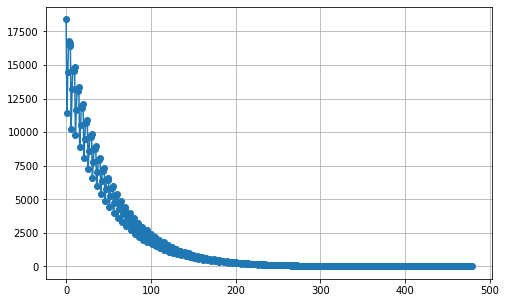

In [270]:
plt.figure(figsize=(8,5))
plt.plot(loss,'-o')
plt.grid()

In [282]:
thetas=np.array(thetas)

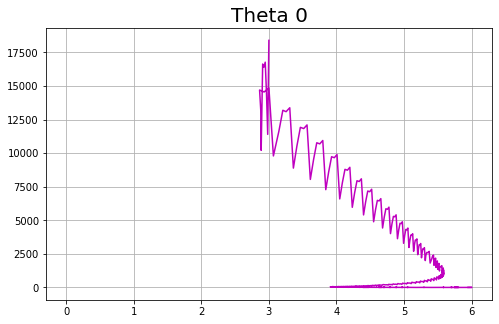

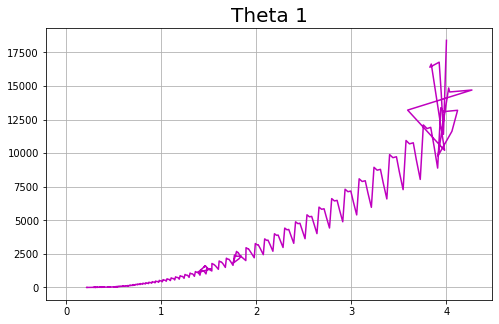

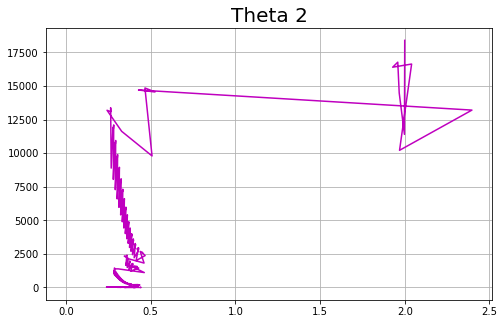

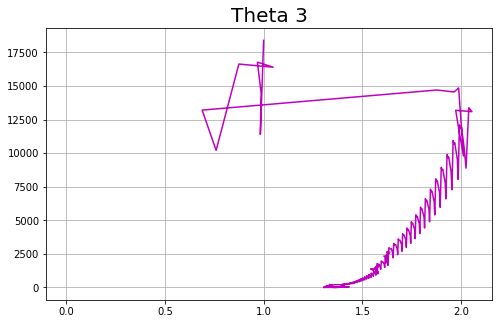

In [283]:
for i in range(4):
  plt.figure(figsize=(8,5))
  plt.plot(thetas[:,i], loss,i,color='m')
  plt.title('Theta '+str(i), fontsize = 20)
  plt.grid()
  plt.show()

when comparing between the 2 optimizers it's found that the BFGS can converge much faster than the ADAM optimizer although it comes with the down side of it having many oscillations till it converges hence making it more prone to overshooting 
from the results of the adam optimiser it took more epochs to converge but it was more stable than the BFGS